In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV, TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np

In [72]:
set1 = pd.read_csv('../Data/SET_main.csv')
macro = pd.read_csv('../Data/macro_data.csv')

In [73]:
macro= macro.set_index('Date')
set1 = set1.set_index('Date')

In [74]:
macro

,Interest_Rate,GDP,Unemployment,Inflation_x
Date,,,,
2012-10-01,NaN,16420.419,NaN,NaN
2012-12-01,0.16,16420.419,7.9,231.221
2013-01-01,0.14,16648.189,8.0,231.679
2013-02-01,0.15,16648.189,7.7,232.937
2013-03-01,0.14,16648.189,7.5,232.282
...,...,...,...,...
2024-07-01,5.33,29354.321,4.3,313.534
2024-08-01,5.33,29354.321,4.2,314.121
2024-09-01,5.13,29354.321,4.1,314.686


In [75]:
set1

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,BH.BK,CPALL.BK,CPF.BK,CPN.BK,DELTA.BK,INTUCH.BK,IVL.BK,KBANK.BK,KTB.BK,MINT.BK,PTT.BK,PTTEP.BK,SCC.BK,TLI.BK,TRUE.BK,TTB.BK
Date,,,,,,,,,,,,,,,,,,,,
2014-01-02,115.707718,13.004047,112.167679,8.865041,68.680260,33.136932,22.704103,31.580965,4.015340,36.063679,14.913614,107.741760,9.801531,15.467829,16.889353,93.353264,263.643097,NaN,5.398062,1.198794
2014-01-03,121.276535,12.870898,113.856926,8.824376,69.914040,33.136932,22.704103,31.159889,3.846470,36.908909,14.837524,111.814507,9.864768,15.223603,16.519506,92.148697,262.951080,NaN,5.318678,1.186436
2014-01-06,124.370338,12.648987,117.235474,9.678346,69.091515,33.344036,21.773603,31.580965,3.696364,37.190655,14.913614,116.257462,9.991238,16.363337,16.272949,89.137321,266.410950,NaN,5.477446,1.217332
2014-01-07,129.939148,13.447869,120.276176,9.556353,68.474640,33.965359,22.704103,32.844204,3.771417,38.176769,15.446239,119.959930,10.244180,17.096024,17.320827,92.449852,269.178833,NaN,5.636212,1.229691
2014-01-08,127.464134,12.870898,119.938316,9.312358,67.446487,33.551144,22.145802,32.633663,3.790180,38.035900,15.978870,119.959930,9.991238,16.526157,17.567390,94.256683,271.254822,NaN,5.398062,1.248229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-03,296.000000,61.209999,150.500000,26.000000,212.000000,63.750000,24.200001,60.500000,151.000000,102.500000,24.600000,153.500000,20.299999,27.750000,32.250000,128.500000,184.000000,11.3,11.900000,1.790000
2024-12-04,289.000000,61.500000,151.500000,25.750000,211.000000,64.000000,24.100000,60.500000,151.000000,100.000000,24.500000,155.000000,20.600000,28.000000,32.250000,128.000000,183.000000,11.2,12.100000,1.780000
2024-12-06,295.000000,61.000000,152.000000,25.500000,210.000000,63.000000,24.100000,60.250000,150.500000,102.500000,25.250000,156.000000,20.700001,27.500000,32.250000,128.000000,183.500000,10.9,11.800000,1.830000


In [76]:
# Loop through each unique ticker (stock) in the DataFrame
indicator = pd.DataFrame()
for ticker in set1.columns:
    # Calculate SMAs 
    indicator[f'{ticker}_SMA3'] = set1[ticker].rolling(window=3).mean()
    indicator[f'{ticker}_SMA20'] = set1[ticker].rolling(window=20).mean()
    indicator[f'{ticker}_SMA50'] = set1[ticker].rolling(window=50).mean()
    indicator[f'{ticker}_SMA100'] = set1[ticker].rolling(window=100).mean()
    indicator[f'{ticker}_SMA200'] = set1[ticker].rolling(window=200).mean()
    
    # Calculate EMA
    indicator[f'{ticker}_EMA3'] = set1[ticker].ewm(span=3, adjust=False).mean()
    indicator[f'{ticker}_EMA12'] = set1[ticker].ewm(span=12, adjust=False).mean()
    indicator[f'{ticker}_EMA26'] = set1[ticker].ewm(span=26, adjust=False).mean()
    
    # Calculate MACD
    indicator[f'{ticker}_MACD'] = indicator[f'{ticker}_EMA12'] - indicator[f'{ticker}_EMA26']
    
    # Calculate Signal line (9-day EMA of the MACD)
    indicator[f'{ticker}_signal'] = indicator[f'{ticker}_MACD'].ewm(span=9, adjust=False).mean()
    
    # Concatenate each ticker's results into the final indicator DataFrame
    indicator = pd.concat([indicator, set1], axis=1)

In [77]:
indicator = indicator.dropna()

In [78]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Merge all the files that have X-variable (features)
features_df = pd.merge(macro, indicator, on='Date', how='outer')
features_df = features_df.fillna(method='ffill').dropna()

In [79]:
# drop the same column names
features_df = features_df.loc[:, ~features_df.columns.duplicated()]

In [80]:
# Make the rows number the same with target and features files
# set the index to the format Datetime
set1.index = pd.to_datetime(set1.index)
features_df.index = pd.to_datetime(features_df.index)

# Align the two DataFrames by finding the intersection of their indices
common_index = set1.index.intersection(features_df.index)

# Reindex both DataFrames to the common index
set1 = set1.loc[common_index]
features_df = features_df.loc[common_index]

In [81]:
features_df.shape, set1.shape

((381, 224), (381, 20))

Processing stock: ADVANC.BK
Training set shape for ADVANC.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for ADVANC.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for ADVANC.BK: {'alpha': 0.1}
Performance for ADVANC.BK - RMSE: 4.714604985977677


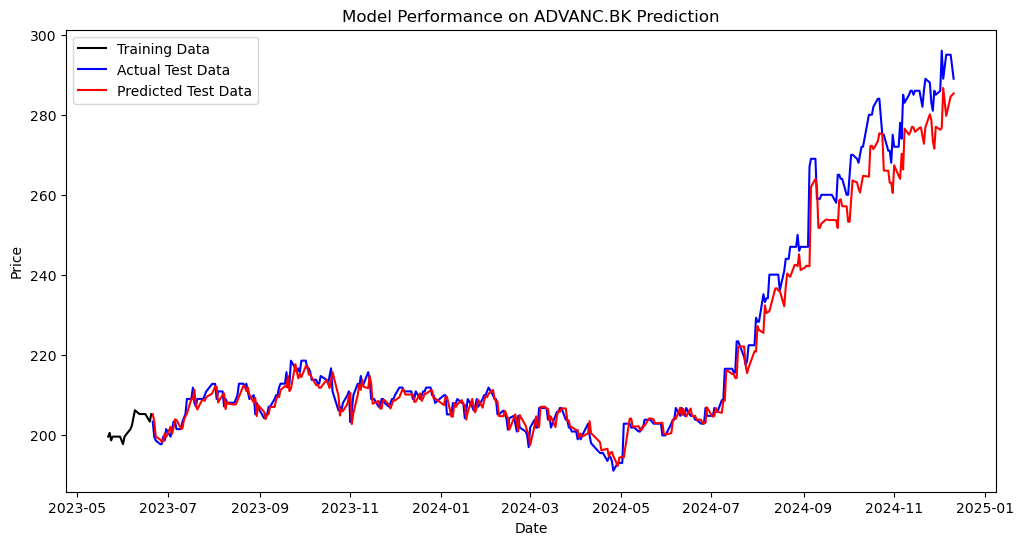

Processing stock: AOT.BK
Training set shape for AOT.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for AOT.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for AOT.BK: {'alpha': 10}
Performance for AOT.BK - RMSE: 4.471918189128619


<Figure size 640x480 with 0 Axes>

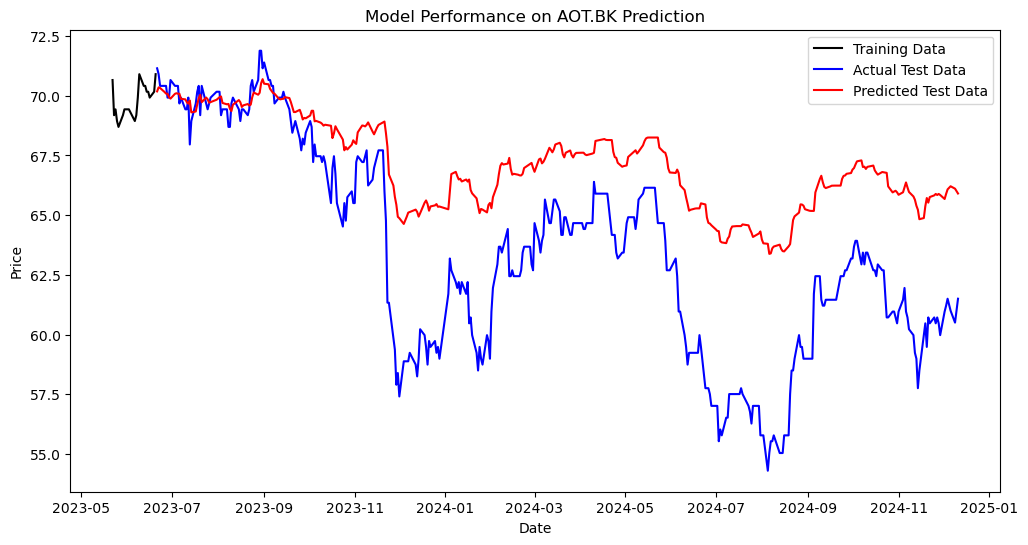

Processing stock: BBL.BK
Training set shape for BBL.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for BBL.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BBL.BK: {'alpha': 10}
Performance for BBL.BK - RMSE: 11.212488702302638


<Figure size 640x480 with 0 Axes>

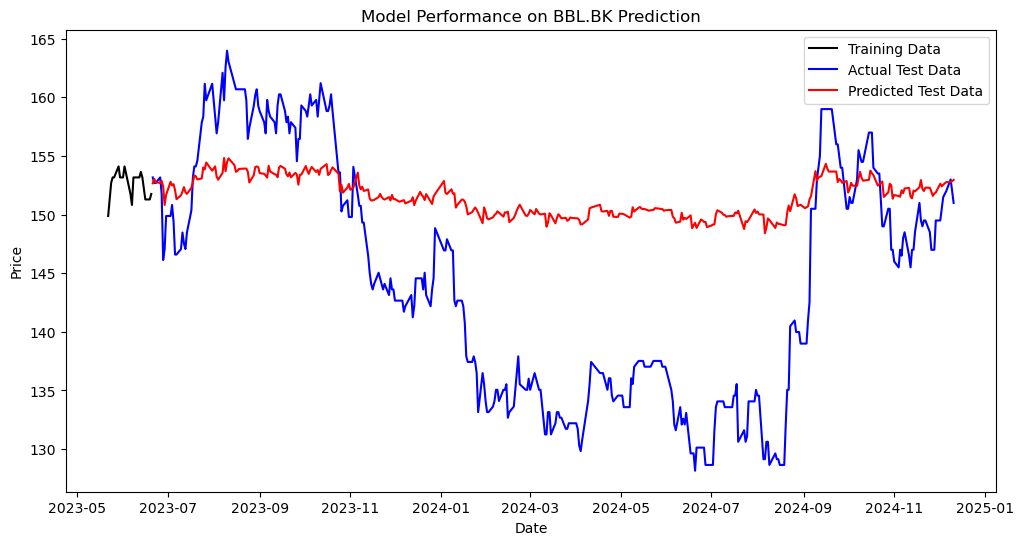

Processing stock: BDMS.BK
Training set shape for BDMS.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for BDMS.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BDMS.BK: {'alpha': 0.01}
Performance for BDMS.BK - RMSE: 0.4553075740988356


<Figure size 640x480 with 0 Axes>

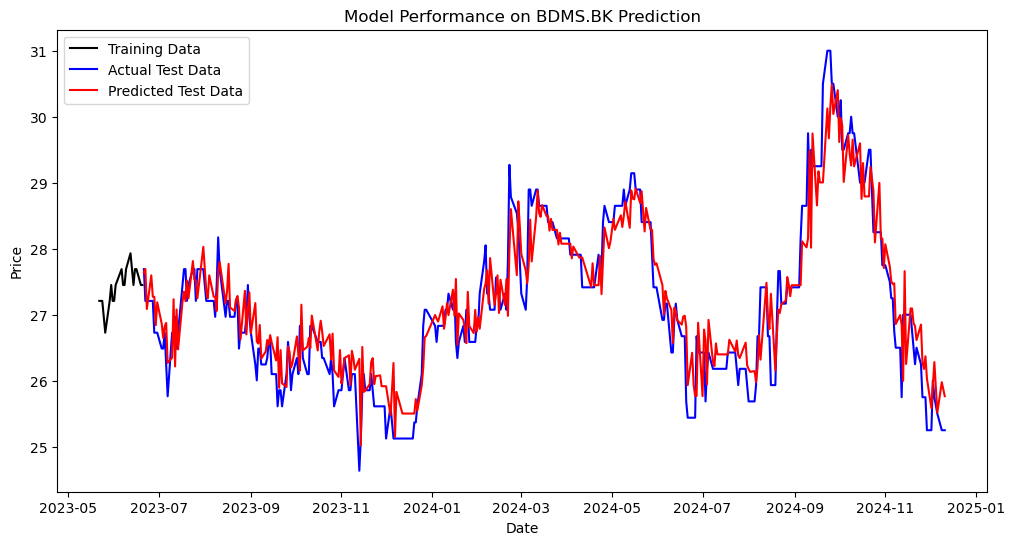

Processing stock: BH.BK
Training set shape for BH.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for BH.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BH.BK: {'alpha': 100}
Performance for BH.BK - RMSE: 13.95624669776551


<Figure size 640x480 with 0 Axes>

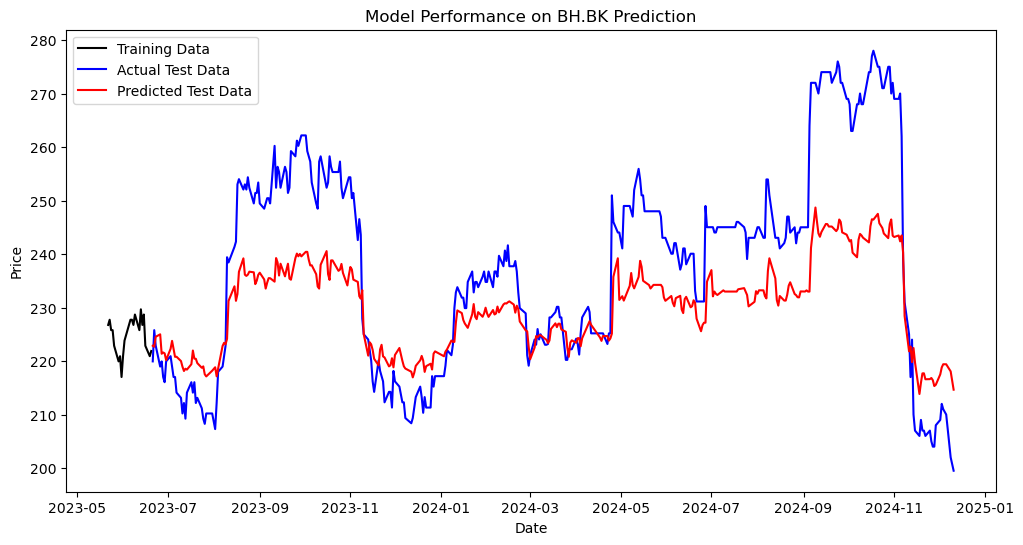

Processing stock: CPALL.BK
Training set shape for CPALL.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for CPALL.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPALL.BK: {'alpha': 1}
Performance for CPALL.BK - RMSE: 1.553779706840409


<Figure size 640x480 with 0 Axes>

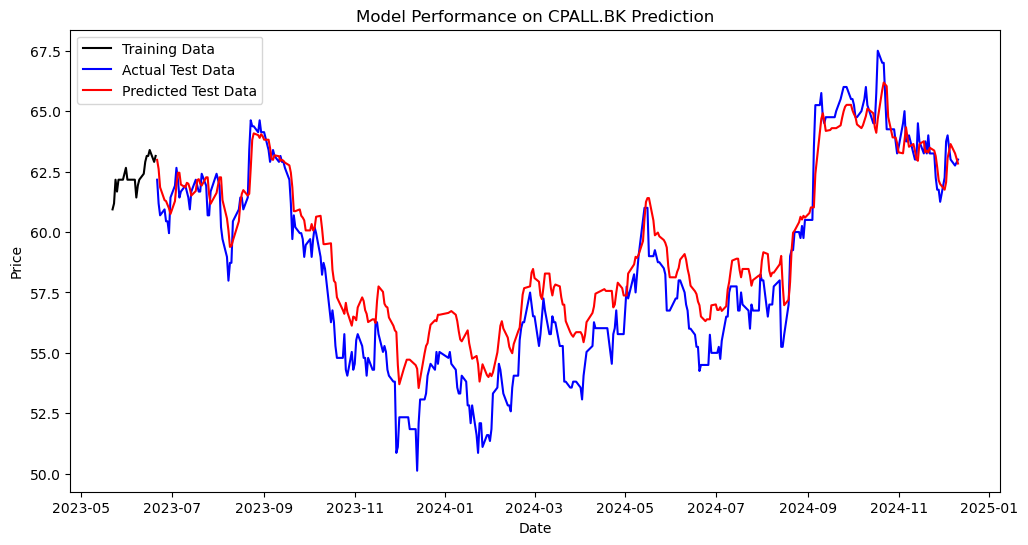

Processing stock: CPF.BK
Training set shape for CPF.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for CPF.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPF.BK: {'alpha': 0.1}
Performance for CPF.BK - RMSE: 0.5632035871552333


<Figure size 640x480 with 0 Axes>

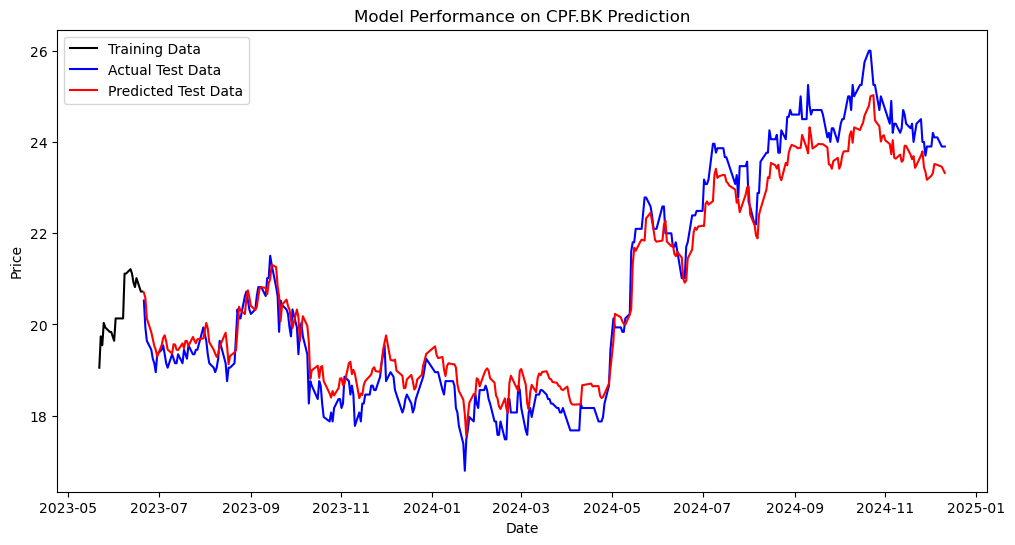

Processing stock: CPN.BK
Training set shape for CPN.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for CPN.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPN.BK: {'alpha': 100}
Performance for CPN.BK - RMSE: 4.62391070311771


<Figure size 640x480 with 0 Axes>

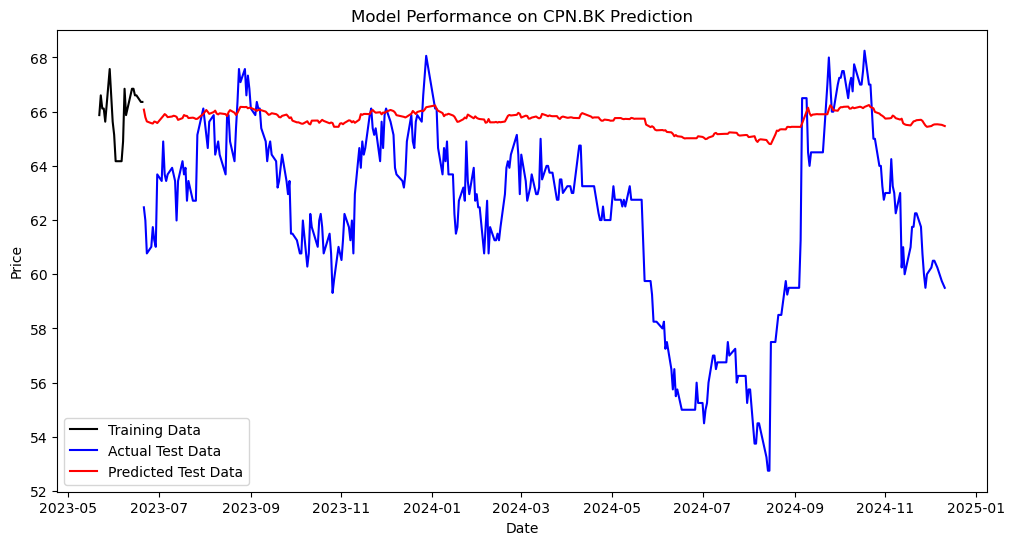

Processing stock: DELTA.BK
Training set shape for DELTA.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for DELTA.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for DELTA.BK: {'alpha': 1}
Performance for DELTA.BK - RMSE: 12.041433869172847


<Figure size 640x480 with 0 Axes>

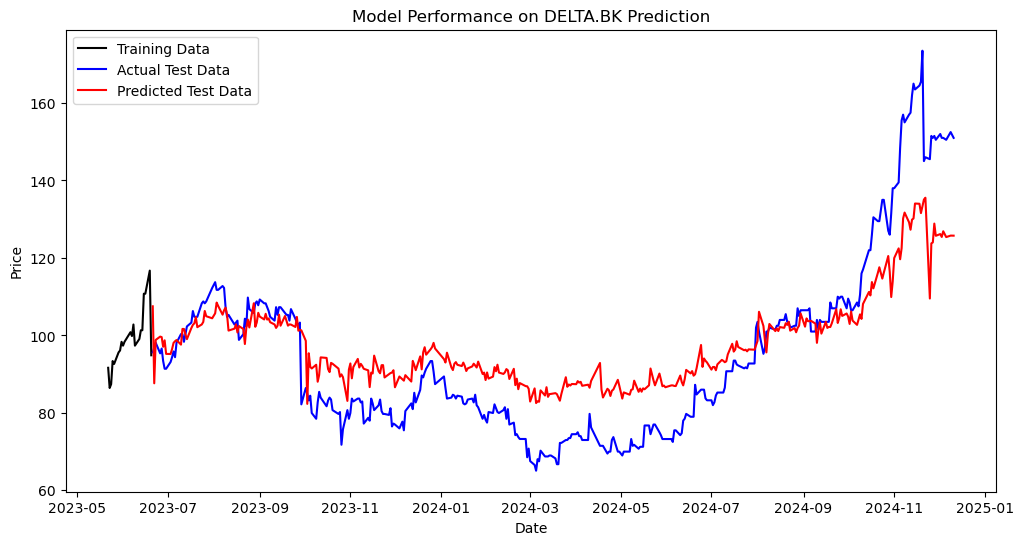

Processing stock: INTUCH.BK
Training set shape for INTUCH.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for INTUCH.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for INTUCH.BK: {'alpha': 1}
Performance for INTUCH.BK - RMSE: 6.835047710560747


<Figure size 640x480 with 0 Axes>

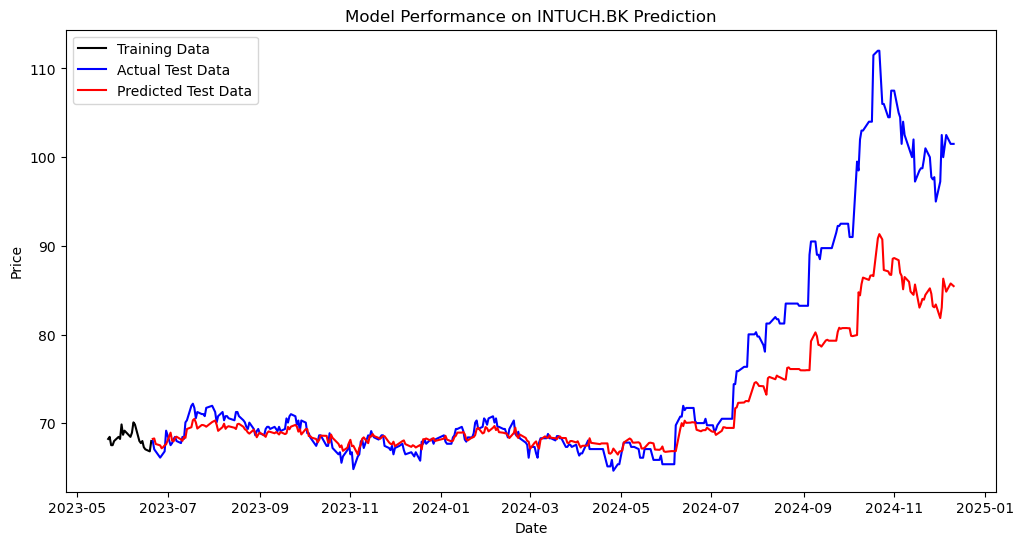

Processing stock: IVL.BK
Training set shape for IVL.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for IVL.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for IVL.BK: {'alpha': 0.01}
Performance for IVL.BK - RMSE: 0.7288212817887734


<Figure size 640x480 with 0 Axes>

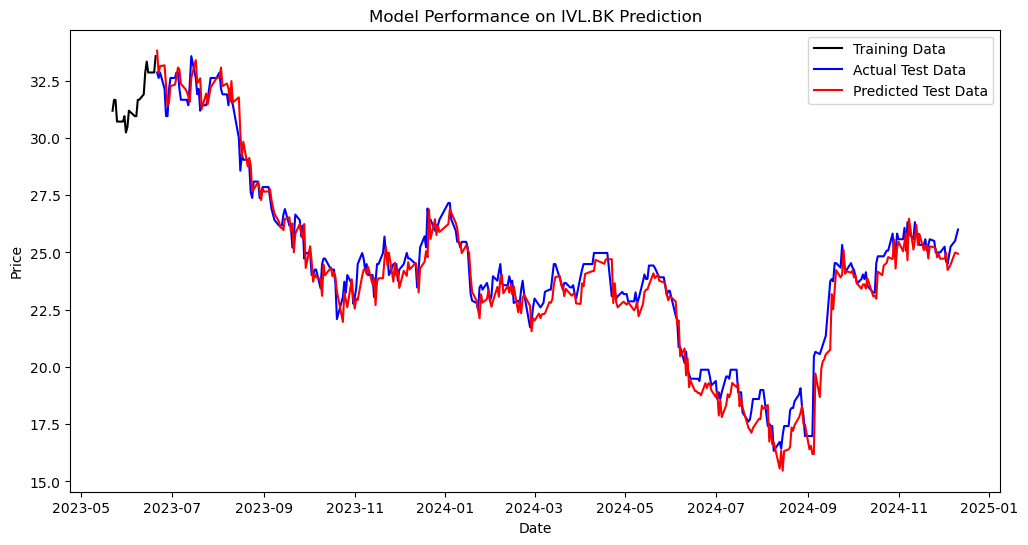

Processing stock: KBANK.BK
Training set shape for KBANK.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for KBANK.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for KBANK.BK: {'alpha': 100}
Performance for KBANK.BK - RMSE: 10.066331495726137


<Figure size 640x480 with 0 Axes>

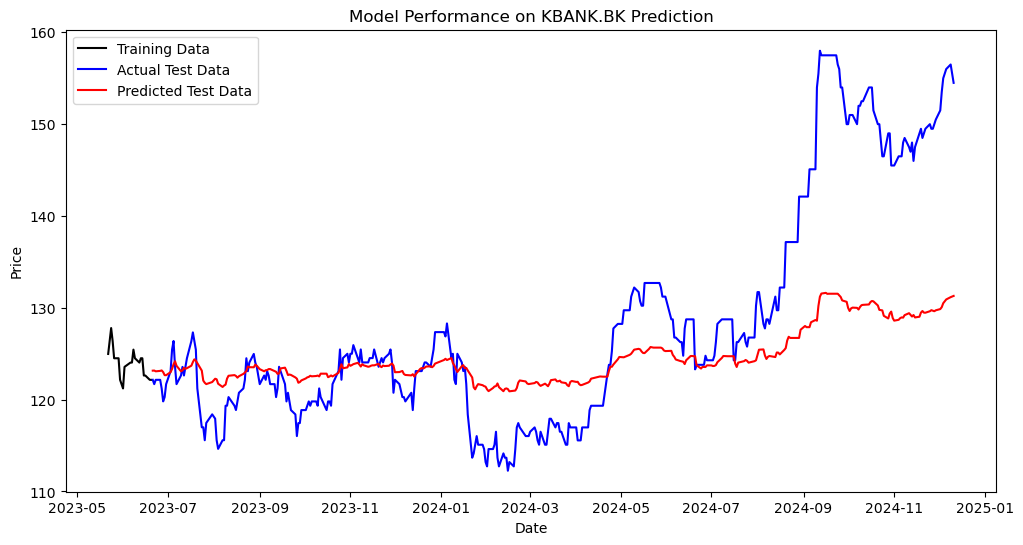

Processing stock: KTB.BK
Training set shape for KTB.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for KTB.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for KTB.BK: {'alpha': 100}
Performance for KTB.BK - RMSE: 1.6948333467601544


<Figure size 640x480 with 0 Axes>

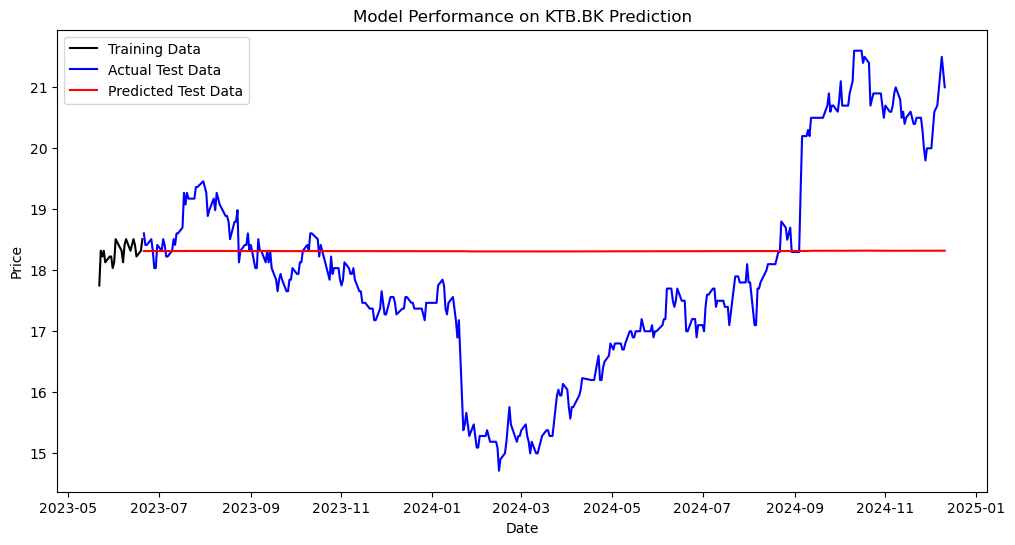

Processing stock: MINT.BK
Training set shape for MINT.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for MINT.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for MINT.BK: {'alpha': 1}
Performance for MINT.BK - RMSE: 1.6777283543774029


<Figure size 640x480 with 0 Axes>

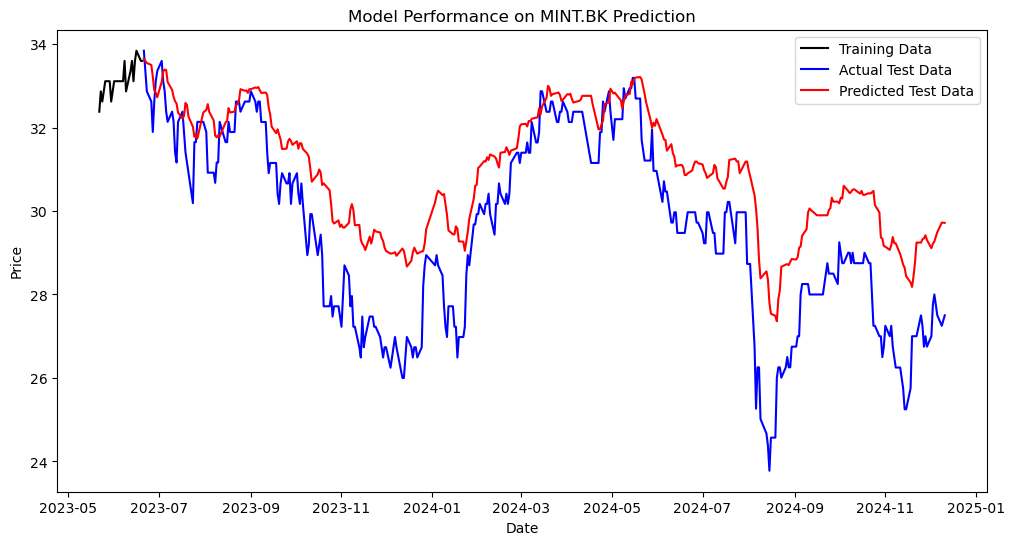

Processing stock: PTT.BK
Training set shape for PTT.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for PTT.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for PTT.BK: {'alpha': 10}
Performance for PTT.BK - RMSE: 2.6283575942775133


<Figure size 640x480 with 0 Axes>

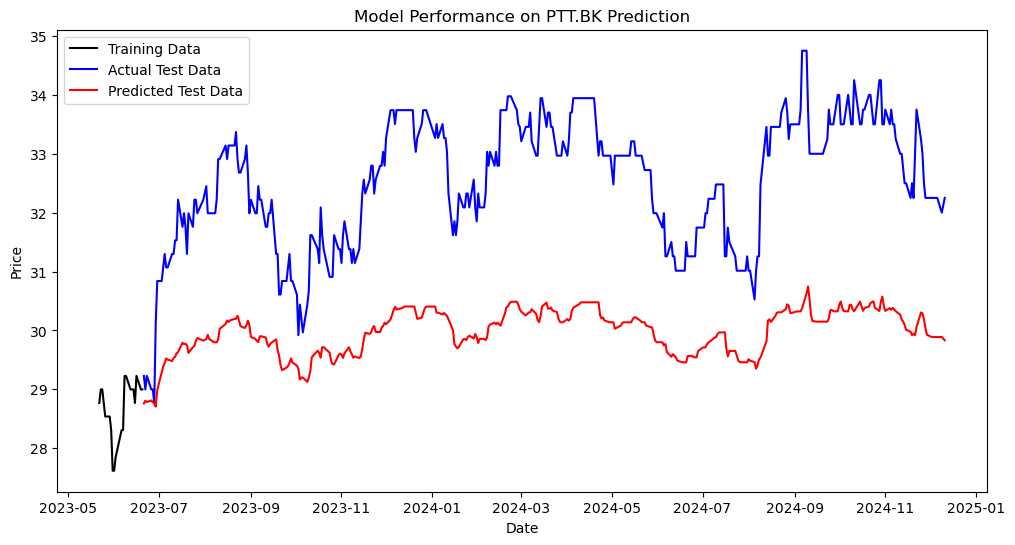

Processing stock: PTTEP.BK
Training set shape for PTTEP.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for PTTEP.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for PTTEP.BK: {'alpha': 100}
Performance for PTTEP.BK - RMSE: 4.558538958365513


<Figure size 640x480 with 0 Axes>

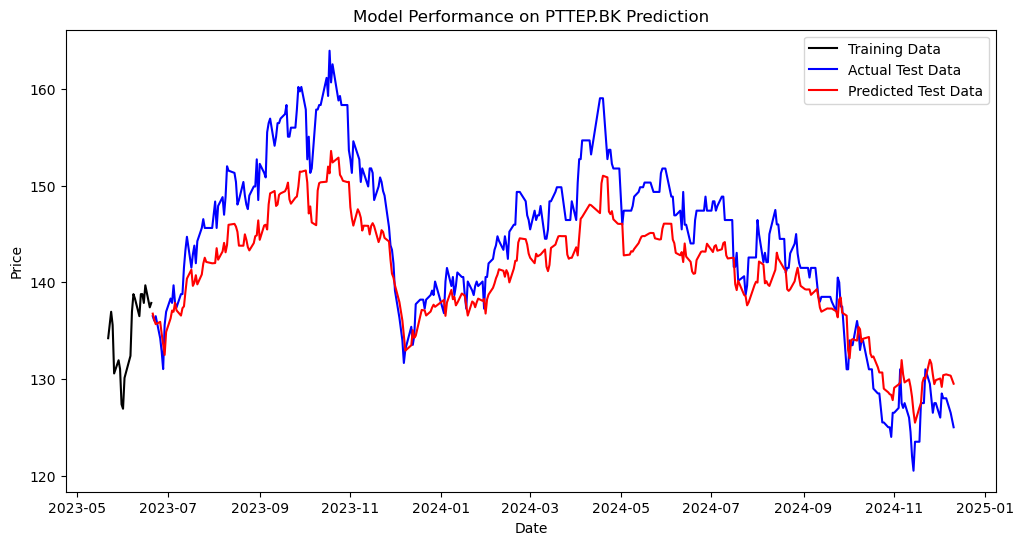

Processing stock: SCC.BK
Training set shape for SCC.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for SCC.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for SCC.BK: {'alpha': 100}
Performance for SCC.BK - RMSE: 40.7439714481455


<Figure size 640x480 with 0 Axes>

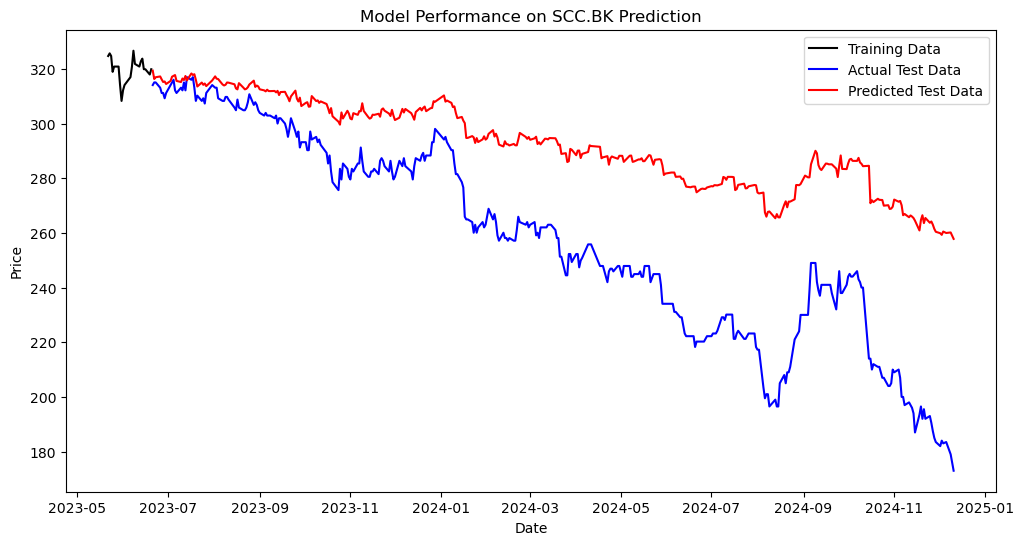

Processing stock: TLI.BK
Training set shape for TLI.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for TLI.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TLI.BK: {'alpha': 0.01}
Performance for TLI.BK - RMSE: 0.5776192272565601


<Figure size 640x480 with 0 Axes>

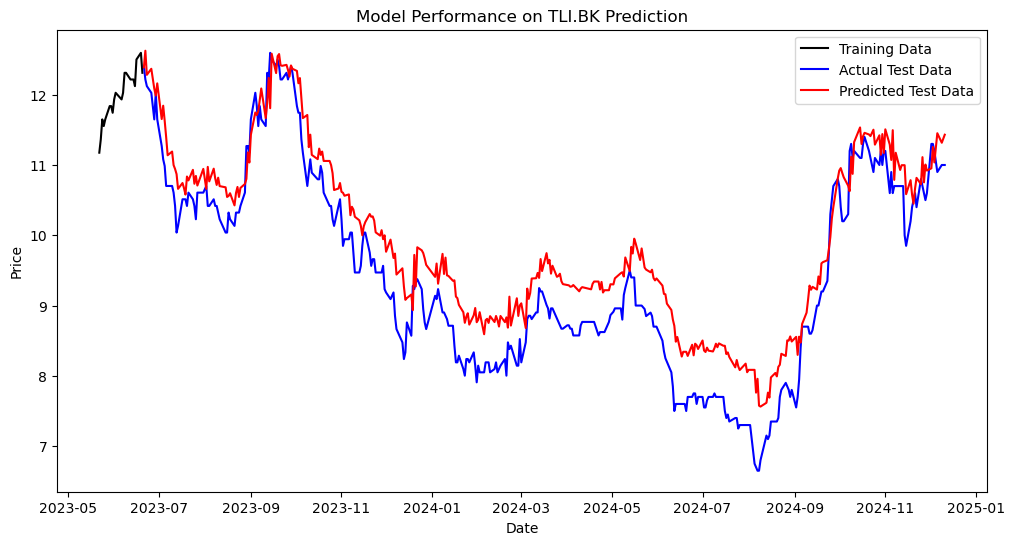

Processing stock: TRUE.BK
Training set shape for TRUE.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for TRUE.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TRUE.BK: {'alpha': 1}
Performance for TRUE.BK - RMSE: 2.359127867691684


<Figure size 640x480 with 0 Axes>

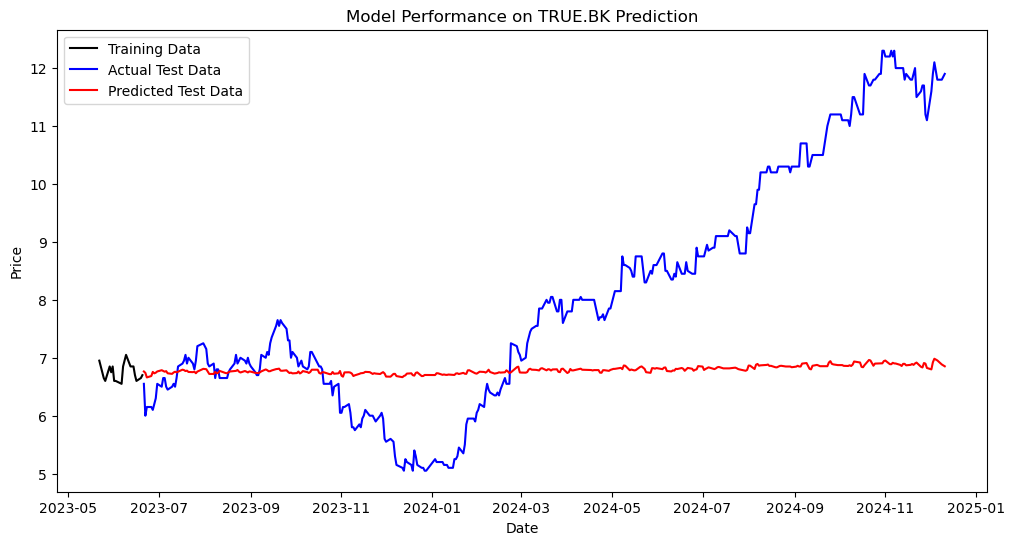

Processing stock: TTB.BK
Training set shape for TTB.BK: X_train: (18, 3), y_train: (18,)
Testing set shape for TTB.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TTB.BK: {'alpha': 0.01}
Performance for TTB.BK - RMSE: 0.10172293533532625


<Figure size 640x480 with 0 Axes>

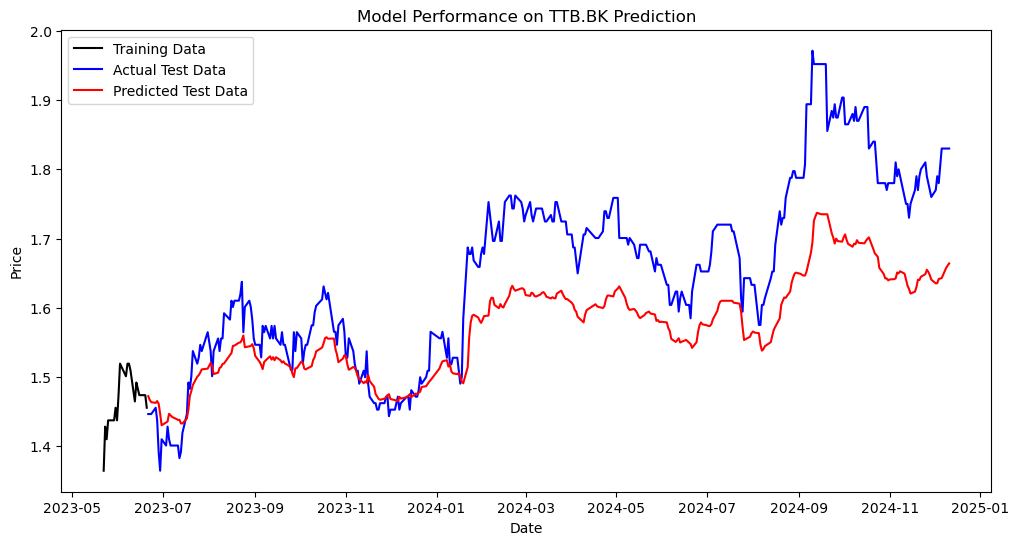

<Figure size 640x480 with 0 Axes>

In [82]:
# Initialize dictionaries to store results
results = {}

# Define the hyperparameter
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100] 
}

# Fixed test size for the last 360 rows
test_size = 360

# Time Series Split for cross-validation (preserves order)
tscv = TimeSeriesSplit(n_splits=3)

# Define function to create lag features
def create_lag_features(data, lags=3):
    df = pd.DataFrame()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = data.shift(lag)
    df['target'] = data  
    return df.dropna()

# Loop through each stock in the set1 DataFrame
for stock in set1.columns:
    
    print(f"Processing stock: {stock}")
    
    # Prepare lag features for univariate prediction
    lagged_data = create_lag_features(set1[stock], lags=3)
    
    # Define training and testing sets
    X = lagged_data.drop(columns=['target']).values 
    y = lagged_data['target'].values                
    
    # Split data into train and test sets
    X_train, X_test = X[:-test_size], X[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]
    
    # Print dataset shapes
    print(f"Training set shape for {stock}: X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Testing set shape for {stock}: X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    # Initialize Ridge Regression model
    ridge_reg = Ridge()

    # Perform Grid ssearch
    grid_search = GridSearchCV(estimator=ridge_reg, 
                               param_grid=param_grid, 
                               cv=tscv, 
                               scoring='neg_mean_squared_error', 
                               verbose=1)
    
    # Fit the GridSearchCV model to the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {stock}: {best_params}")
    
    # Use the best estimator found by GridSearchCV to make predictions
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Performance for {stock} - RMSE: {rmse}')
    
    # Store the results (model, predictions, evaluation metrics)
    results[stock] = {
        'model': best_model, 
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse
    }
    
    # Combine training and testing actual prices for visualization
    plt.figure(figsize=(12, 6))
    plt.plot(set1[stock].index[:-test_size], set1[stock].values[:-test_size], color='black', label='Training Data')
    plt.plot(set1[stock].index[-test_size:], set1[stock].values[-test_size:], color='blue', label='Actual Test Data')
    plt.plot(set1[stock].index[-test_size:], y_pred, color='red', label='Predicted Test Data')
    plt.title(f'Model Performance on {stock} Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Save the plot
    plt.savefig(f'../images/{stock}_ridge_prediction_uni_2023.png', format='png')
